<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Random Forest Model for Kaggle

### Initializations

In [37]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Feature Selection on Complete Training Set

In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from IPython.display import clear_output
import itertools as it

In [49]:
dff = pd.read_pickle('exchange/hr_01_enriched_train.pkl')
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
satisfactionLevel                  10000 non-null float64
yearsSinceEvaluation               10000 non-null float64
numberOfProjects                   10000 non-null int64
averageMonthlyHours                10000 non-null int64
yearsAtCompany                     10000 non-null int64
workAccident                       10000 non-null category
hasLeftCompany                     10000 non-null category
gotPromotion                       10000 non-null category
department                         10000 non-null category
salary                             10000 non-null category
projectsPerYear                    10000 non-null float64
hoursPerProject                    10000 non-null float64
satisfactionHours                  10000 non-null float64
workingHoursSinceLastEvaluation    10000 non-null float64
evaluationSatisfaction             10000 non-null float64
projectsPerWorkingHour 

In [50]:
# Datentyp von Category in Object umwandeln
for col in dff.select_dtypes(['category']):
    print('transforming', col)
    dff[col] = dff[col].astype('str')

transforming workAccident
transforming hasLeftCompany
transforming gotPromotion
transforming department
transforming salary


In [51]:
columns = list(dff.columns)
columns.remove('hasLeftCompany')
columns

['satisfactionLevel',
 'yearsSinceEvaluation',
 'numberOfProjects',
 'averageMonthlyHours',
 'yearsAtCompany',
 'workAccident',
 'gotPromotion',
 'department',
 'salary',
 'projectsPerYear',
 'hoursPerProject',
 'satisfactionHours',
 'workingHoursSinceLastEvaluation',
 'evaluationSatisfaction',
 'projectsPerWorkingHour']

In [55]:
results = pd.DataFrame([], columns=['combination', 'score'])
for i in range(0,4):
    combinations = set(it.combinations(columns,i))
    for idx, comb in enumerate(combinations):
        print()
        print('calculating... combinations with ' + str(i) + ' elements :: ' + str(idx + 1) + ' of ' + str(len(combinations)))
        comb = list(comb)
        comb.append('hasLeftCompany')
        df = pd.get_dummies(dff.drop(comb, axis=1)).join(dff[['hasLeftCompany']])
        y = df['hasLeftCompany'].values
        X = df.drop(['hasLeftCompany'], axis=1).values
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
        clf = RandomForestClassifier(max_features=0.6, n_estimators=200)
        scores = cross_val_score(clf, X_scaled, y, cv=10, n_jobs=-1)
        results = results.append(pd.DataFrame([[','.join(comb), scores.mean()]], columns=results.columns))
        clear_output()
        print(color.BOLD + 'best scores so far:' + color.END)
        print(results.sort_values('score', ascending=False).head(5))

best scores so far:
                                         combination   score
0  projectsPerYear,workingHoursSinceLastEvaluatio...  0.9880
0  department,projectsPerYear,workingHoursSinceLa...  0.9879
0  workAccident,gotPromotion,evaluationSatisfacti...  0.9879
0  workAccident,workingHoursSinceLastEvaluation,h...  0.9879
0  yearsSinceEvaluation,department,workingHoursSi...  0.9879


In [56]:
results.sort_values('score', ascending=False).head(10)

,combination,score
0,"projectsPerYear,workingHoursSinceLastEvaluatio...",0.9880
0,"department,projectsPerYear,workingHoursSinceLa...",0.9879
0,"workAccident,gotPromotion,evaluationSatisfacti...",0.9879
0,"workAccident,workingHoursSinceLastEvaluation,h...",0.9879
0,"yearsSinceEvaluation,department,workingHoursSi...",0.9879
0,"workingHoursSinceLastEvaluation,hasLeftCompany",0.9879
0,"salary,workingHoursSinceLastEvaluation,hasLeft...",0.9879
0,"yearsSinceEvaluation,gotPromotion,workingHours...",0.9879
0,"department,workingHoursSinceLastEvaluation,has...",0.9879
0,"department,workingHoursSinceLastEvaluation,pro...",0.9879


In [65]:
results.sort_values('score', ascending=False).iloc[0:1]['combination'].values

array(['projectsPerYear,workingHoursSinceLastEvaluation,hasLeftCompany'], dtype=object)

### Load Data

In [84]:
df = pd.read_pickle('exchange/hr_01_enriched_train.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
satisfactionLevel                  10000 non-null float64
yearsSinceEvaluation               10000 non-null float64
numberOfProjects                   10000 non-null int64
averageMonthlyHours                10000 non-null int64
yearsAtCompany                     10000 non-null int64
workAccident                       10000 non-null category
hasLeftCompany                     10000 non-null category
gotPromotion                       10000 non-null category
department                         10000 non-null category
salary                             10000 non-null category
projectsPerYear                    10000 non-null float64
hoursPerProject                    10000 non-null float64
satisfactionHours                  10000 non-null float64
workingHoursSinceLastEvaluation    10000 non-null float64
evaluationSatisfaction             10000 non-null float64
projectsPerWorkingHour 

In [85]:
# Datentyp von Category in Object umwandeln
for col in df.select_dtypes(['category']):
    print('transforming', col)
    df[col] = df[col].astype('str')

transforming workAccident
transforming hasLeftCompany
transforming gotPromotion
transforming department
transforming salary


In [86]:
df = pd.get_dummies(df.drop(['projectsPerYear','workingHoursSinceLastEvaluation','hasLeftCompany'], axis=1)).join(df[['hasLeftCompany']])
df.head()

,satisfactionLevel,yearsSinceEvaluation,numberOfProjects,averageMonthlyHours,yearsAtCompany,hoursPerProject,satisfactionHours,evaluationSatisfaction,projectsPerWorkingHour,valuableEmployee,...,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium,hasLeftCompany
0,0.65,0.96,5,226,2,1084.8,146.90,0.6240,0.001920,1,...,0,1,0,0,0,0,0,0,1,0
1,0.88,0.80,3,166,2,1328.0,146.08,0.7040,0.001883,0,...,0,0,0,0,0,0,0,1,0,0
2,0.69,0.98,3,214,2,1712.0,147.66,0.6762,0.001192,0,...,0,0,0,1,0,0,0,1,0,0
3,0.41,0.47,2,154,3,2772.0,63.14,0.1927,0.002303,0,...,0,0,0,1,0,0,0,1,0,1
4,0.87,0.76,5,254,2,1219.2,220.98,0.6612,0.002158,0,...,0,0,0,0,0,0,0,1,0,0


In [87]:
y_train = df['hasLeftCompany'].values
y_train

array(['0', '0', '0', ..., '0', '0', '1'], dtype=object)

In [88]:
X_train = df.drop(['hasLeftCompany'], axis=1).values
X_train

array([[ 0.65,  0.96,  5.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.88,  0.8 ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.69,  0.98,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ..., 
       [ 0.83,  0.86,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.74,  0.56,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.11,  0.88,  7.  , ...,  0.  ,  0.  ,  1.  ]])

In [89]:
scaler = MinMaxScaler()

In [90]:
X_train_scaled = scaler.fit_transform(X_train)

In [91]:
df = pd.read_pickle('exchange/hr_01_enriched_test.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 17 columns):
id                                 4999 non-null int64
satisfactionLevel                  4999 non-null float64
yearsSinceEvaluation               4999 non-null float64
numberOfProjects                   4999 non-null int64
averageMonthlyHours                4999 non-null int64
yearsAtCompany                     4999 non-null int64
workAccident                       4999 non-null category
gotPromotion                       4999 non-null category
department                         4999 non-null category
salary                             4999 non-null category
projectsPerYear                    4999 non-null float64
hoursPerProject                    4999 non-null float64
satisfactionHours                  4999 non-null float64
workingHoursSinceLastEvaluation    4999 non-null float64
evaluationSatisfaction             4999 non-null float64
projectsPerWorkingHour             4999 no

In [92]:
# Datentyp von Category in Object umwandeln
for col in df.select_dtypes(['category']):
    print('transforming', col)
    df[col] = df[col].astype('str')

transforming workAccident
transforming gotPromotion
transforming department
transforming salary


In [93]:
df = pd.get_dummies(df.drop(['projectsPerYear','workingHoursSinceLastEvaluation','id'], axis=1)).join(df[['id']])
df.head()

,satisfactionLevel,yearsSinceEvaluation,numberOfProjects,averageMonthlyHours,yearsAtCompany,hoursPerProject,satisfactionHours,evaluationSatisfaction,projectsPerWorkingHour,valuableEmployee,...,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium,id
0,0.81,0.96,4,219,2,1314.0,177.39,0.7776,0.001585,1,...,0,0,0,0,0,1,0,1,0,10000
1,0.86,0.84,4,246,6,4428.0,211.56,0.7224,0.001613,0,...,0,0,0,0,0,0,0,1,0,10001
2,0.90,0.66,4,242,3,2178.0,217.80,0.5940,0.002087,0,...,0,0,0,0,1,0,1,0,0,10002
3,0.37,0.54,2,131,3,2358.0,48.47,0.1998,0.002356,0,...,0,0,0,0,0,0,0,0,1,10003
4,0.52,0.96,3,271,3,3252.0,140.92,0.4992,0.000961,0,...,0,0,0,0,0,1,0,0,1,10004


In [94]:
ids = df['id']
ids.head()

0    10000
1    10001
2    10002
3    10003
4    10004
Name: id, dtype: int64

In [95]:
X_test = df.drop(['id'], axis=1).values
X_test

array([[ 0.81,  0.96,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.86,  0.84,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.9 ,  0.66,  4.  , ...,  1.  ,  0.  ,  0.  ],
       ..., 
       [ 0.66,  0.73,  5.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.79,  1.  ,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.98,  0.86,  2.  , ...,  0.  ,  1.  ,  0.  ]])

In [96]:
X_test_scaled = scaler.transform(X_test)

### Hyperparameter Tuning

In [104]:
from sklearn.model_selection import GridSearchCV

In [132]:
clf = RandomForestClassifier(random_state=10)
param_space = {'n_estimators':[100,200,300,500], 'max_features': [0.2,0.3,0.4,0.6], 'max_depth': [None,20,30,40]}
gs = GridSearchCV(clf, param_space, cv=10, n_jobs=-1)
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300, 500], 'max_features': [0.2, 0.3, 0.4, 0.6], 'max_depth': [None, 20, 30, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


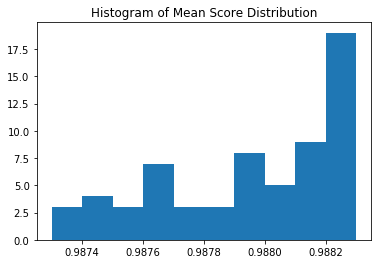

In [133]:
scores = pd.DataFrame(gs.grid_scores_)
plt.hist(scores['mean_validation_score'], bins=10)
plt.title('Histogram of Mean Score Distribution');

In [134]:
gs.best_score_

0.98829999999999996

In [135]:
gs.best_params_

{'max_depth': None, 'max_features': 0.3, 'n_estimators': 200}

### Predict Kaggle Data

In [137]:
clf = RandomForestClassifier(max_features=0.3, n_estimators=200)

In [138]:
scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, n_jobs=-1)
scores.mean()

0.9881995881995882

In [139]:
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [140]:
predictions = clf.predict(X_test_scaled)
list(predictions)

['0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0'

In [141]:
list(ids)

[10000,
 10001,
 10002,
 10003,
 10004,
 10005,
 10006,
 10007,
 10008,
 10009,
 10010,
 10011,
 10012,
 10013,
 10014,
 10015,
 10016,
 10017,
 10018,
 10019,
 10020,
 10021,
 10022,
 10023,
 10024,
 10025,
 10026,
 10027,
 10028,
 10029,
 10030,
 10031,
 10032,
 10033,
 10034,
 10035,
 10036,
 10037,
 10038,
 10039,
 10040,
 10041,
 10042,
 10043,
 10044,
 10045,
 10046,
 10047,
 10048,
 10049,
 10050,
 10051,
 10052,
 10053,
 10054,
 10055,
 10056,
 10057,
 10058,
 10059,
 10060,
 10061,
 10062,
 10063,
 10064,
 10065,
 10066,
 10067,
 10068,
 10069,
 10070,
 10071,
 10072,
 10073,
 10074,
 10075,
 10076,
 10077,
 10078,
 10079,
 10080,
 10081,
 10082,
 10083,
 10084,
 10085,
 10086,
 10087,
 10088,
 10089,
 10090,
 10091,
 10092,
 10093,
 10094,
 10095,
 10096,
 10097,
 10098,
 10099,
 10100,
 10101,
 10102,
 10103,
 10104,
 10105,
 10106,
 10107,
 10108,
 10109,
 10110,
 10111,
 10112,
 10113,
 10114,
 10115,
 10116,
 10117,
 10118,
 10119,
 10120,
 10121,
 10122,
 10123,
 10124,


In [142]:
df = pd.DataFrame(
    {'id': ids,
     'left': predictions
    })
df.head()

,id,left
0,10000,0
1,10001,1
2,10002,0
3,10003,1
4,10004,0


In [143]:
df.to_csv('kaggle/random_forest.csv', index=False)

**Ergebnis in Kaggle:** 99.132%